# Example Notebook of NRHybSur2dq15 surrogate model

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
import gwsurrogate

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Download the surrogate data, this only needs to be done once

In [ ]:
# This may take a few minutes.

gwsurrogate.catalog.pull('NRHybSur2dq15')

## Load the surrogate, this only needs to be done once at the start of a script

In [2]:
sur = gwsurrogate.LoadSurrogate('NRHybSur2dq15')

Loaded NRHybSur2dq15 model


## Read the documentation.

In [3]:
help(sur)

Help on NRHybSur2dq15 in module gwsurrogate.surrogate object:

class NRHybSur2dq15(SurrogateEvaluator)
 |  NRHybSur2dq15(h5filename)
 |  
 |  A class for the NRHybSur2dq15 surrogate model presented in
 |  arxiv:xxxx.xxxx. #FIXME
 |  
 |  Evaluates gravitational waveforms generated by aligned-spin binary black hole
 |  systems. This model was built using numerical relativity (NR) waveforms that
 |  have been hybridized using post-Newtonian (PN) and effective one body (EOB)
 |  waveforms.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  (2,2), (2,1), (3,3), (4,4) and (5,5).
 |  The m<0 modes are deduced from the m>0 modes.
 |  
 |  The surrogate has been trained in the range
 |  q \in [1, 15] and chi1z \in [-0.5, 0.5] chi2Z = 0,
 |  where q is the mass ratio and chi1z/chi2z are the spins of heavier/lighter
 |  BH, respectively, in the direction of orbital angular momentum.
 |  
 |  The model produces reasonable extrapolation up to q = 20 with chi1z =

## Evaluate the waveform.

### Evaluate waveform modes in dimensionless units (default)

In [4]:
q = 15            # mass ratio 
chiA = [0,0,0.5]  # spin of heavier BH
chiB = [0,0,0]    # spin of lighter BH
dt = 0.1          # step size of time domain, Units of M
f_low = 0.01      # initial frequency, Units of cycles/M. 
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)  # dyn stands for dynamics and is always None for this model

# Let's see all available modes (m<0 will be included automatically if inclination/phi_ref arguments are given)
print(sorted(h.keys()))

[(2, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


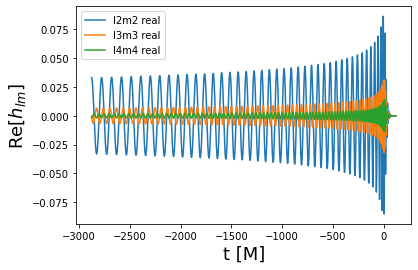

In [5]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate the waveform on a fixed time array

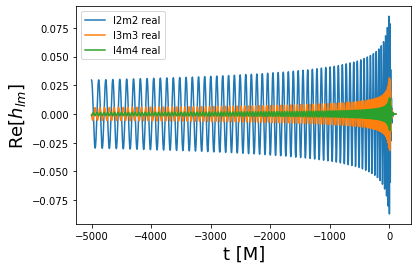

In [6]:
q = 15
chiA = [0,0,0.5]
chiB = [0,0,0]
f_low = 0 # this will be ignored and the waveform will be returned on the times domain given below
times = np.arange(-5000,110,0.1)
# The returned times are the same as the input above.
times, h, dyn = sur(q, chiA, chiB, times=times, f_low=f_low)

P.plot(times, h[(2,2)].real, label='l2m2 real')
P.plot(times, h[(3,3)].real, label='l3m3 real')
P.plot(times, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform modes in physical units

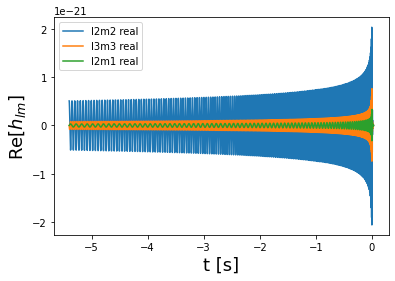

In [7]:
q = 15
chiA = [0,0,0.5]
chiB = [0,0,0]
M = 50             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

Text(0.5, 0, 't [s]')

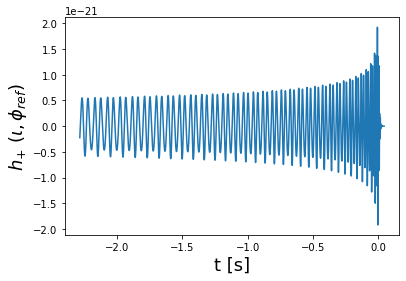

In [8]:
q = 15
chiA = [0, 0, 0.5]
chiB = [0, 0, 0]
M = 80             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes given in mode_list argument as well as the m<0 counterparts.
# If mode_list is not specified, uses all available modes.
# Returns h_+ -i h_x
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)